In [1]:
#Uses cats and dogs dataset, from: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview
# Need to have dog photos in "/train/dog/" and cat photos in "/train/cat, and test photos in /test/"
# I used 50 photos of dogs and 50 of cats to train, and 50 total photos as part of the dataset - the original dataset contains thousands
#of photos. This is for illustration purposes as working with the entire dataset of photots was time consuming.

#Uses Tensorflow to build CNN (Convolutional Neural Network) model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf

work_directory = "C:/catsanddogs2/train"
test_directory= "C:/catsanddogs2/test"
categories_list = ["dog", "cat"]

# Now need to iterate over working directory to get images


image_size=100 # set image size. Lower number means lower resolution


trainingdata= [] #create empty training data set

#This function interates over working directory
def create_training_data():
    for category in categories_list:
        path=os.path.join(work_directory, category) # path to separate cats or dogs directory
        class_number = categories_list.index(category) #1 for cat, 0 for dog
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # read as greyscale
            new_array=cv2.resize(img_array, (image_size, image_size))
            #plt.imshow(img_array, cmap="gray")
            trainingdata.append([new_array, class_number])


create_training_data()
print(len(trainingdata))

c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


202


In [2]:

# need to shuffle data
random.shuffle(trainingdata)
#create sets of variables for features and labels
x=[] #feature set
y=[] #labels

for features, label in trainingdata:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,image_size,image_size,1) #reshape
y=np.array(y)



x=x/255 # scale data
Model = tf.keras.models.Sequential()
Model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=x.shape[1:]))
Model.add(tf.keras.layers.Activation("relu"))
Model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

Model.add(tf.keras.layers.Conv2D(64,(3,3)))
Model.add(tf.keras.layers.Activation("relu"))
Model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

Model.add(tf.keras.layers.Conv2D(128,(3,3)))
Model.add(tf.keras.layers.Activation("relu"))
Model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

Model.add(tf.keras.layers.Conv2D(256,(3,3)))
Model.add(tf.keras.layers.Activation("relu"))
Model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

Model.add(tf.keras.layers.Flatten())
Model.add(tf.keras.layers.Dense(64)) #64 node dense layer
Model.add(tf.keras.layers.Dense(128))
Model.add(tf.keras.layers.Dense(256))

Model.add(tf.keras.layers.Dense(1))
Model.add(tf.keras.layers.Activation('sigmoid'))
#output layer

Model.compile(loss="binary_crossentropy",
        optimizer="adam",
        metrics=['accuracy'])   #Model settings

Mymodel=Model.fit(x,y, epochs=20, validation_split=0.3)  #Compile Model

Model.summary()

#Train and validation loss


Epoch 1/20
5/5 [==============================] - 2s 374ms/step - loss: 0.7015 - accuracy: 0.4752 - val_loss: 0.7085 - val_accuracy: 0.4262
Epoch 2/20
5/5 [==============================] - 2s 336ms/step - loss: 0.6911 - accuracy: 0.5319 - val_loss: 0.7070 - val_accuracy: 0.4262
Epoch 3/20
5/5 [==============================] - 2s 334ms/step - loss: 0.6892 - accuracy: 0.5319 - val_loss: 0.7072 - val_accuracy: 0.4262
Epoch 4/20
5/5 [==============================] - 2s 367ms/step - loss: 0.6990 - accuracy: 0.5319 - val_loss: 0.6957 - val_accuracy: 0.4262
Epoch 5/20
5/5 [==============================] - 2s 353ms/step - loss: 0.6872 - accuracy: 0.6241 - val_loss: 0.6903 - val_accuracy: 0.5738
Epoch 6/20
5/5 [==============================] - 2s 333ms/step - loss: 0.6930 - accuracy: 0.4681 - val_loss: 0.6913 - val_accuracy: 0.5738
Epoch 7/20
5/5 [==============================] - 2s 379ms/step - loss: 0.6934 - accuracy: 0.4468 - val_loss: 0.7017 - val_accuracy: 0.4262
Epoch 8/20
5/5 [====

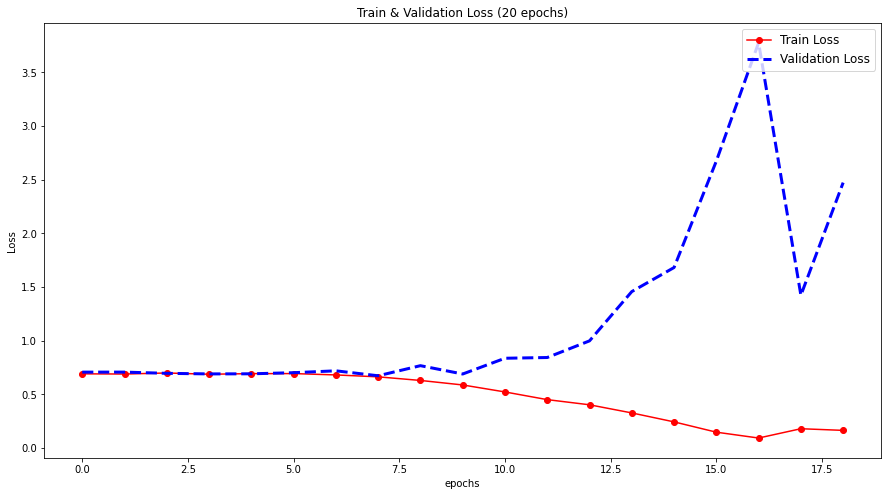

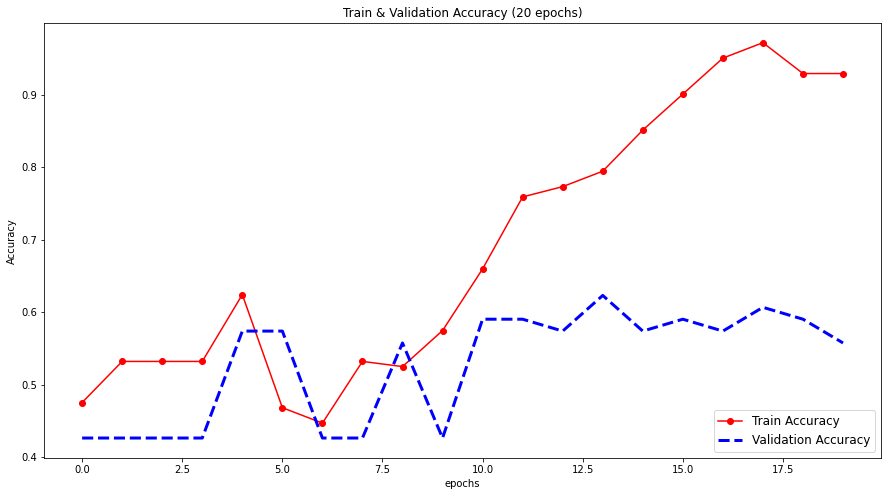

In [3]:
plt.figure(figsize=(15,8))
plt.plot(Mymodel.history['loss'][1:], "ro-", label = "Train Loss")
plt.plot(Mymodel.history['val_loss'][1:], "b--", lw=3, label = "Validation Loss")
plt.legend(loc="upper right", fontsize=12)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train & Validation Loss (20 epochs)", fontsize=12)
plt.show()

# Train and Validation Accuracy
plt.figure(figsize=(15,8))
plt.plot(Mymodel.history['accuracy'], "ro-", label = "Train Accuracy")
plt.plot(Mymodel.history['val_accuracy'], "b--", lw=3, label = "Validation Accuracy")
plt.legend(loc="lower right", fontsize=12)
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train & Validation Accuracy (20 epochs)", fontsize=12)
plt.show()



In [4]:
# Test data
testdata=[]
def create_test_data():
    path=os.path.join(test_directory) # path to separate cats or dogs directory
    #class_number = categories_list.index(category) #0 for cat, 1 for dog
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (image_size, image_size))
        testdata.append([new_array])
create_test_data()
testdata=np.array(testdata).reshape(-1,image_size,image_size,1) #reshape
testdata=testdata/255 # scale data

preds = Model.predict(testdata) #makepredictions
for i in range(len(preds)):
    if preds[i] >= 0.5:
        preds[i] = 1
    else:
        preds[i] = 0
preds



array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

This is image: 0


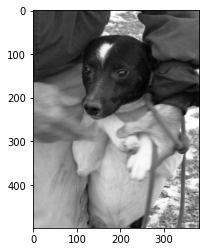

[1.]
This is image: 1


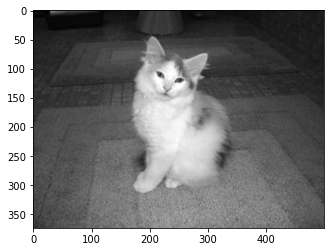

[1.]
This is image: 2


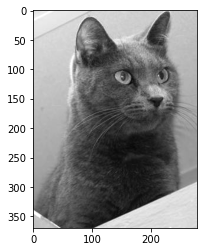

[1.]
This is image: 3


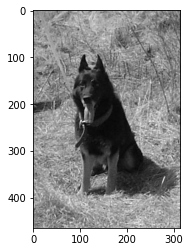

[0.]
This is image: 4


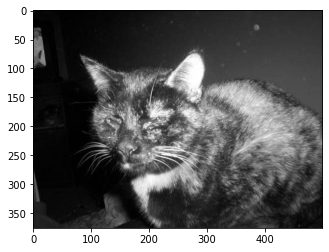

[1.]
This is image: 5


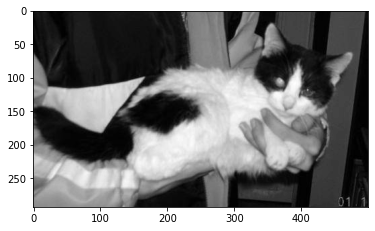

[0.]
This is image: 6


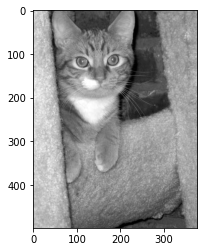

[0.]
This is image: 7


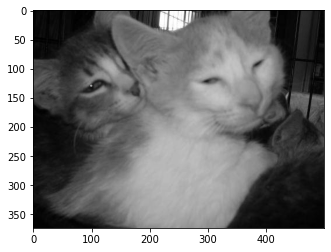

[0.]
This is image: 8


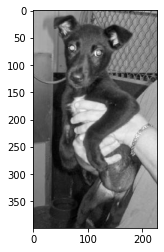

[0.]
This is image: 9


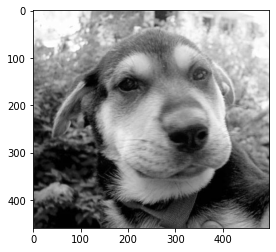

[1.]
This is image: 10


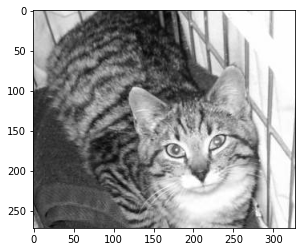

[0.]
This is image: 11


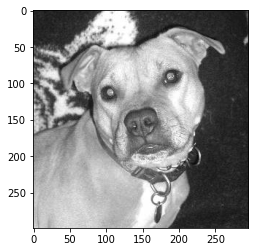

[0.]
This is image: 12


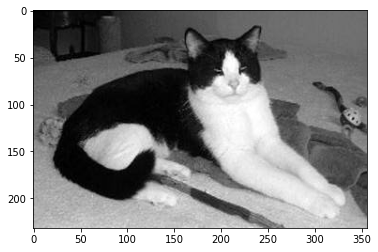

[1.]
This is image: 13


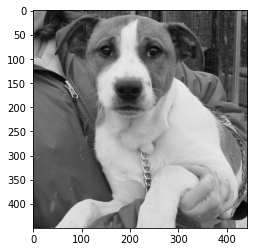

[1.]
This is image: 14


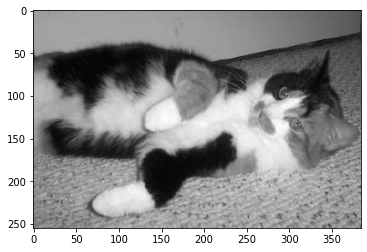

[1.]
This is image: 15


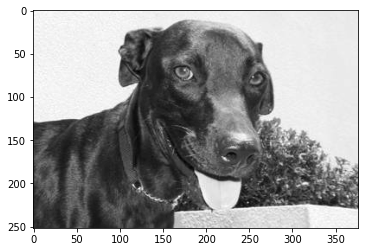

[0.]
This is image: 16


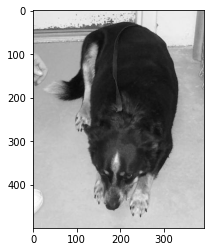

[1.]
This is image: 17


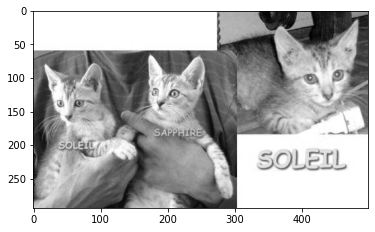

[0.]
This is image: 18


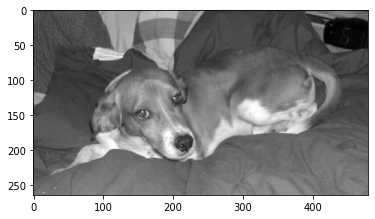

[1.]
This is image: 19


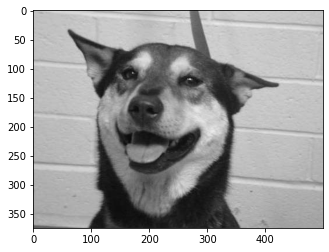

[0.]
This is image: 20


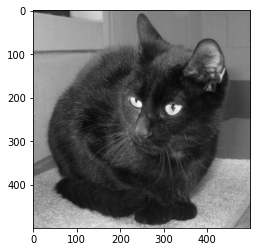

[0.]
This is image: 21


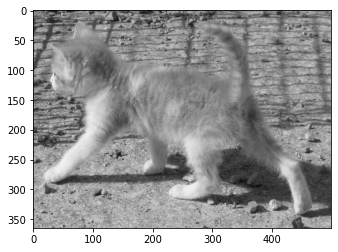

[1.]
This is image: 22


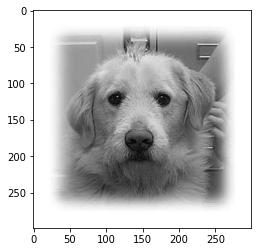

[0.]
This is image: 23


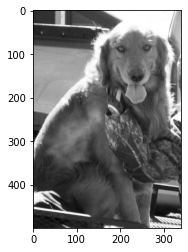

[1.]
This is image: 24


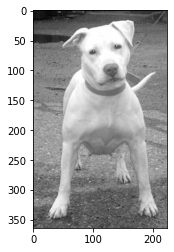

[0.]
This is image: 25


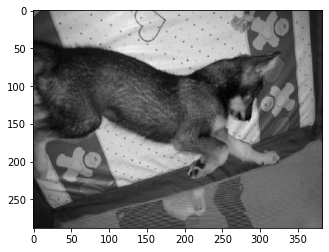

[1.]
This is image: 26


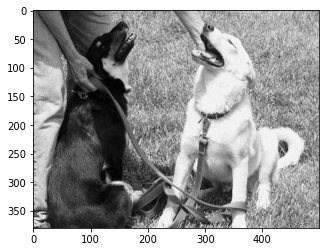

[1.]
This is image: 27


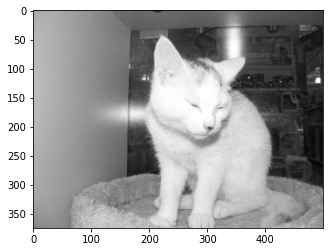

[0.]
This is image: 28


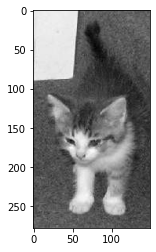

[1.]
This is image: 29


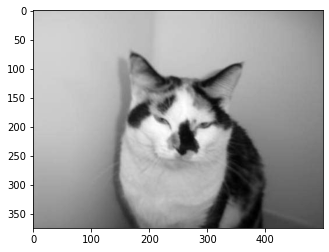

[0.]
This is image: 30


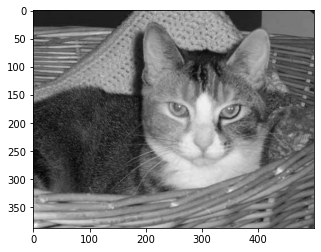

[1.]
This is image: 31


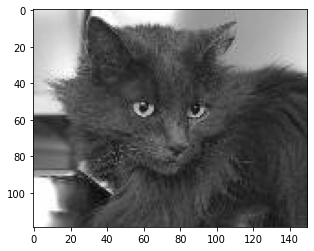

[1.]
This is image: 32


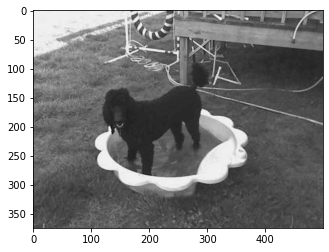

[0.]
This is image: 33


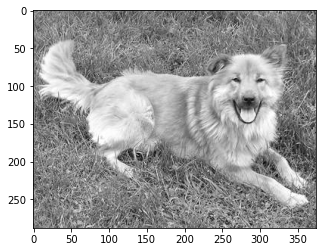

[0.]
This is image: 34


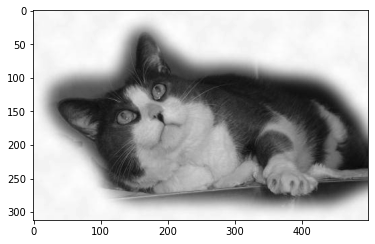

[0.]
This is image: 35


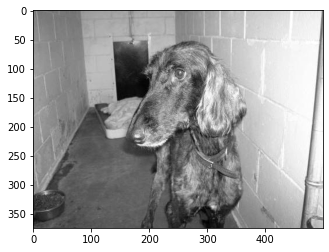

[0.]
This is image: 36


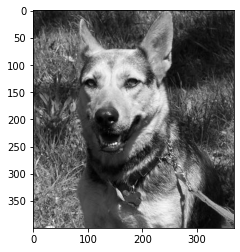

[0.]
This is image: 37


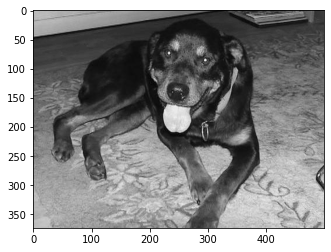

[0.]
This is image: 38


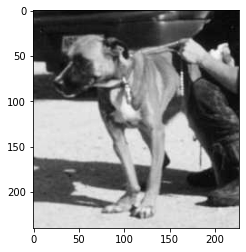

[0.]
This is image: 39


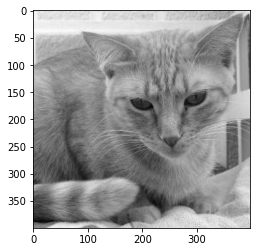

[1.]
This is image: 40


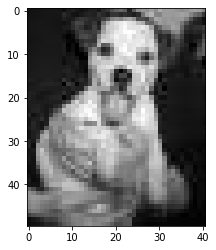

[0.]
This is image: 41


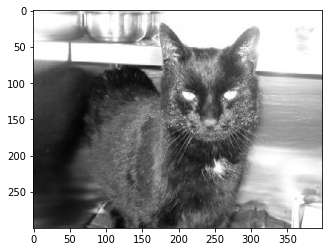

[1.]
This is image: 42


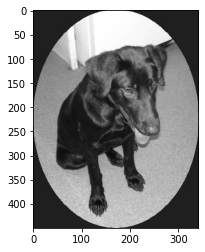

[0.]
This is image: 43


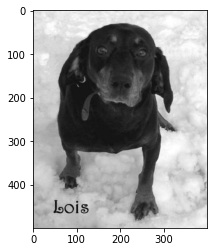

[0.]
This is image: 44


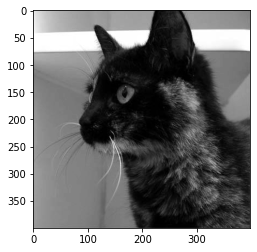

[1.]
This is image: 45


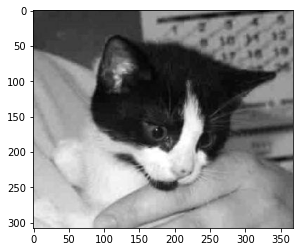

[0.]
This is image: 46


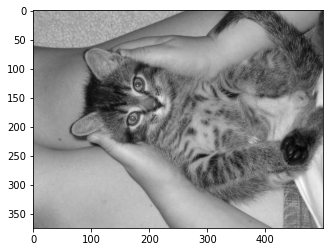

[0.]
This is image: 47


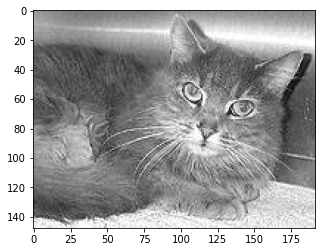

[0.]
This is image: 48


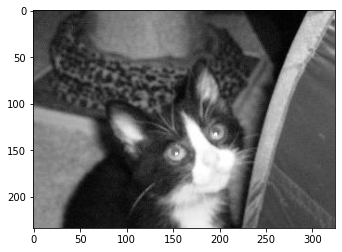

[0.]
This is image: 49


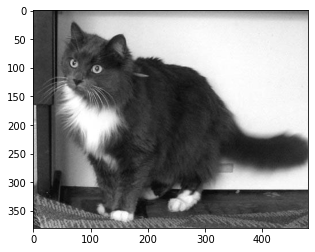

[1.]


In [5]:
i=0
for img in os.listdir(test_directory):
        img_array=cv2.imread(os.path.join(test_directory,img), cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (image_size, image_size))
        plt.imshow(img_array, cmap="gray")
        print("This is image:", i)
        plt.show()
        
        print(preds[i])
        i=i+1

Only got 27 out of 50 correct, for 54% accuracy. Due to small training dataset, and perhaps also model parameters. Using the full dataset can achieve higher accuracy.